<a href="https://colab.research.google.com/github/SommieB/Som-CC/blob/main/FraudDetection_ML_SHAP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import the neccessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost
!pip install shap==0.42.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## machine learning libary
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## for model explainability
import shap

In [ ]:
## load the data
data = pd.read_csv('/content/drive/MyDrive/creditcard 22.csv')

In [ ]:
## head of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Investigate the dataset

This is the process of exploring our data to derive insight, that will be useful for data cleaning, data transformation, and data visualization.

we are going to explore our dataset by the following steps:

* Dimension of the data.

* Data types of the data.

* Duplicate rows check

* Missing values

* Summary Statistics of the data.

**Dimension of the data**

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)
print('The data has {} rows'.format(data.shape[0]))
print('The data has {} features'.format(data.shape[1]))

(284807, 31)
The data has 284807 rows
The data has 31 features


**DataType**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation**

* we have 30 numerical features and 1 integer feature (target variable)

**Duplicate rows**

In [ ]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [ ]:
print(data[data.duplicated()].shape)
print('we have {} duplicate rows'.format(data[data.duplicated()].shape[0]))

(1081, 31)
we have 1081 duplicate rows


**Note**

* The duplicate rows has to be removed in the data cleaning phase.

**Missing values**

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Observation**

* There is no missing values in our data.

**Summary Statistics**

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Observation**

* The average time of transaction is 94813.859575.

* The average time of amount is 88.35 dollars.

**Data Cleaning**

This is the section, we are going to handle some problems, we observed during our EDA session:

1. we have duplicate rows in our dataset

In [ ]:
data_copy = data.copy() ## copy the original data set.

In [ ]:
### remove the duplicate rows
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
print('Data rows before cleaning is {}'.format(data_copy.shape[0]))
print('Data rows after cleaning is {}'.format(data.shape[0]))

Data rows before cleaning is 284807
Data rows after cleaning is 283726


* we lost a few rows after removing the duplicate values, removing the duplicate values, will make our models generalize well.

**Data Transformation**

we are going to have hour as a feature from the **Time** feature.

Note:  'Time' contains the seconds elapsed.

In [ ]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

### Data Visualisation

In this section, we are going to be visualizing our dataset, to understand some hidden pattern, most of the analysis will be focused on the fraudulent class (target feature).

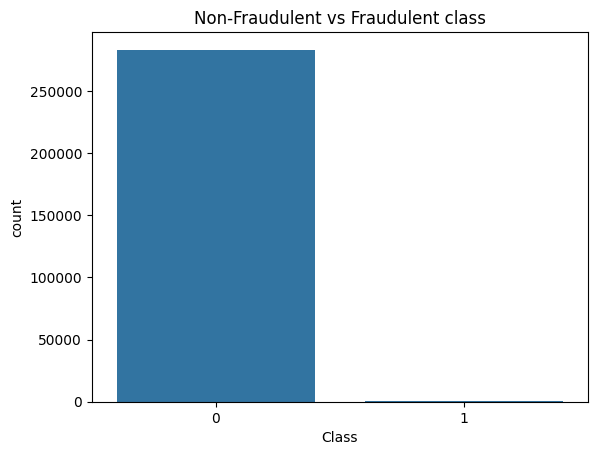

In [ ]:
sns.countplot(x='Class', data=data);
plt.title('Non-Fraudulent vs Fraudulent class');

In [ ]:
data['Class'].value_counts(normalize=True) * 100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

**Observation**

* The class is heavily imbalance against the rare classes (fraudlant activities)

* we have 99.83% of non-fraudlant and 0.167% of fraudlant cases.

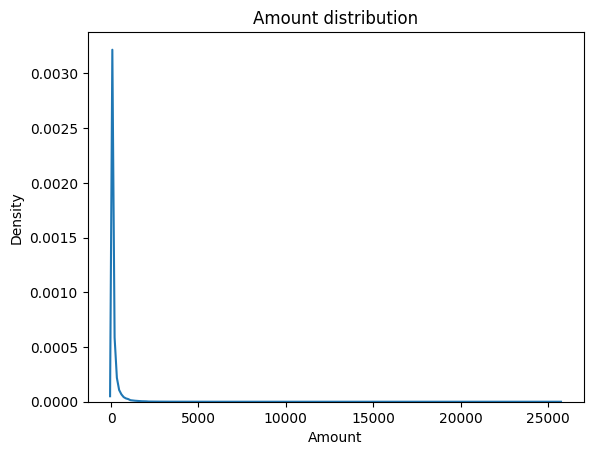

In [ ]:
sns.kdeplot(data['Amount']);
plt.title('Amount distribution');

* The amount is right skewed.
* most amount falls below 100 dollars.

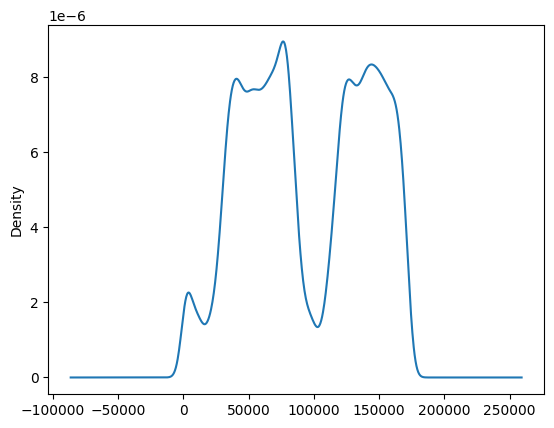

In [ ]:
data['Time'].plot(kind='kde');

* The time plot is symmetric.

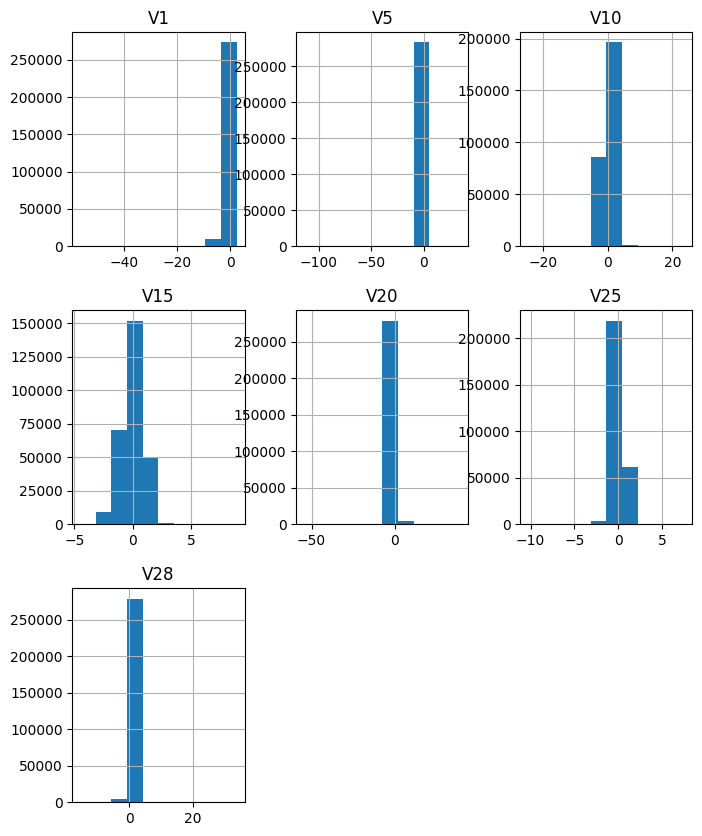

In [ ]:
## check the V tag features
data[['V1', 'V5', 'V10', 'V15', 'V20', 'V25', 'V28']].hist(figsize=(8,10));

* All the V tags features are generated from Principal component analysis

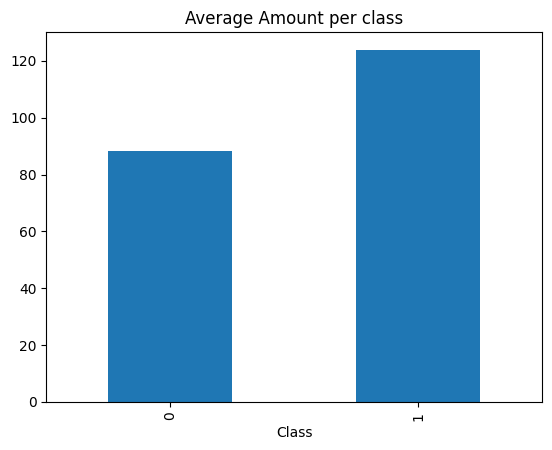

In [ ]:
plt.title('Average Amount per class');
data.groupby('Class')['Amount'].mean().plot(kind='bar');

* On average, we have more amount in the fraudulent class than no fraudulent.

* This depicits that despite having a imbalance class, most fraudulent activities requires huge amount.

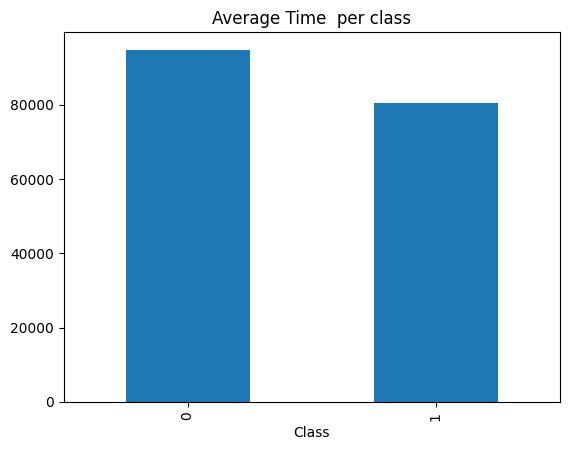

In [ ]:
plt.title('Average Time  per class');
data.groupby('Class')['Time'].mean().plot(kind='bar');

* Fraudulent activites did not also occur fast, The average is not imbalance with Time for non fraudulent activities.

### correlation analysis

This is a statistical Techniques for checking asscoation between 2 variables. it ranges from -1 to 1 range.

* 1 means perfect positively correlated.

* -1 means perfect negatively correlated.

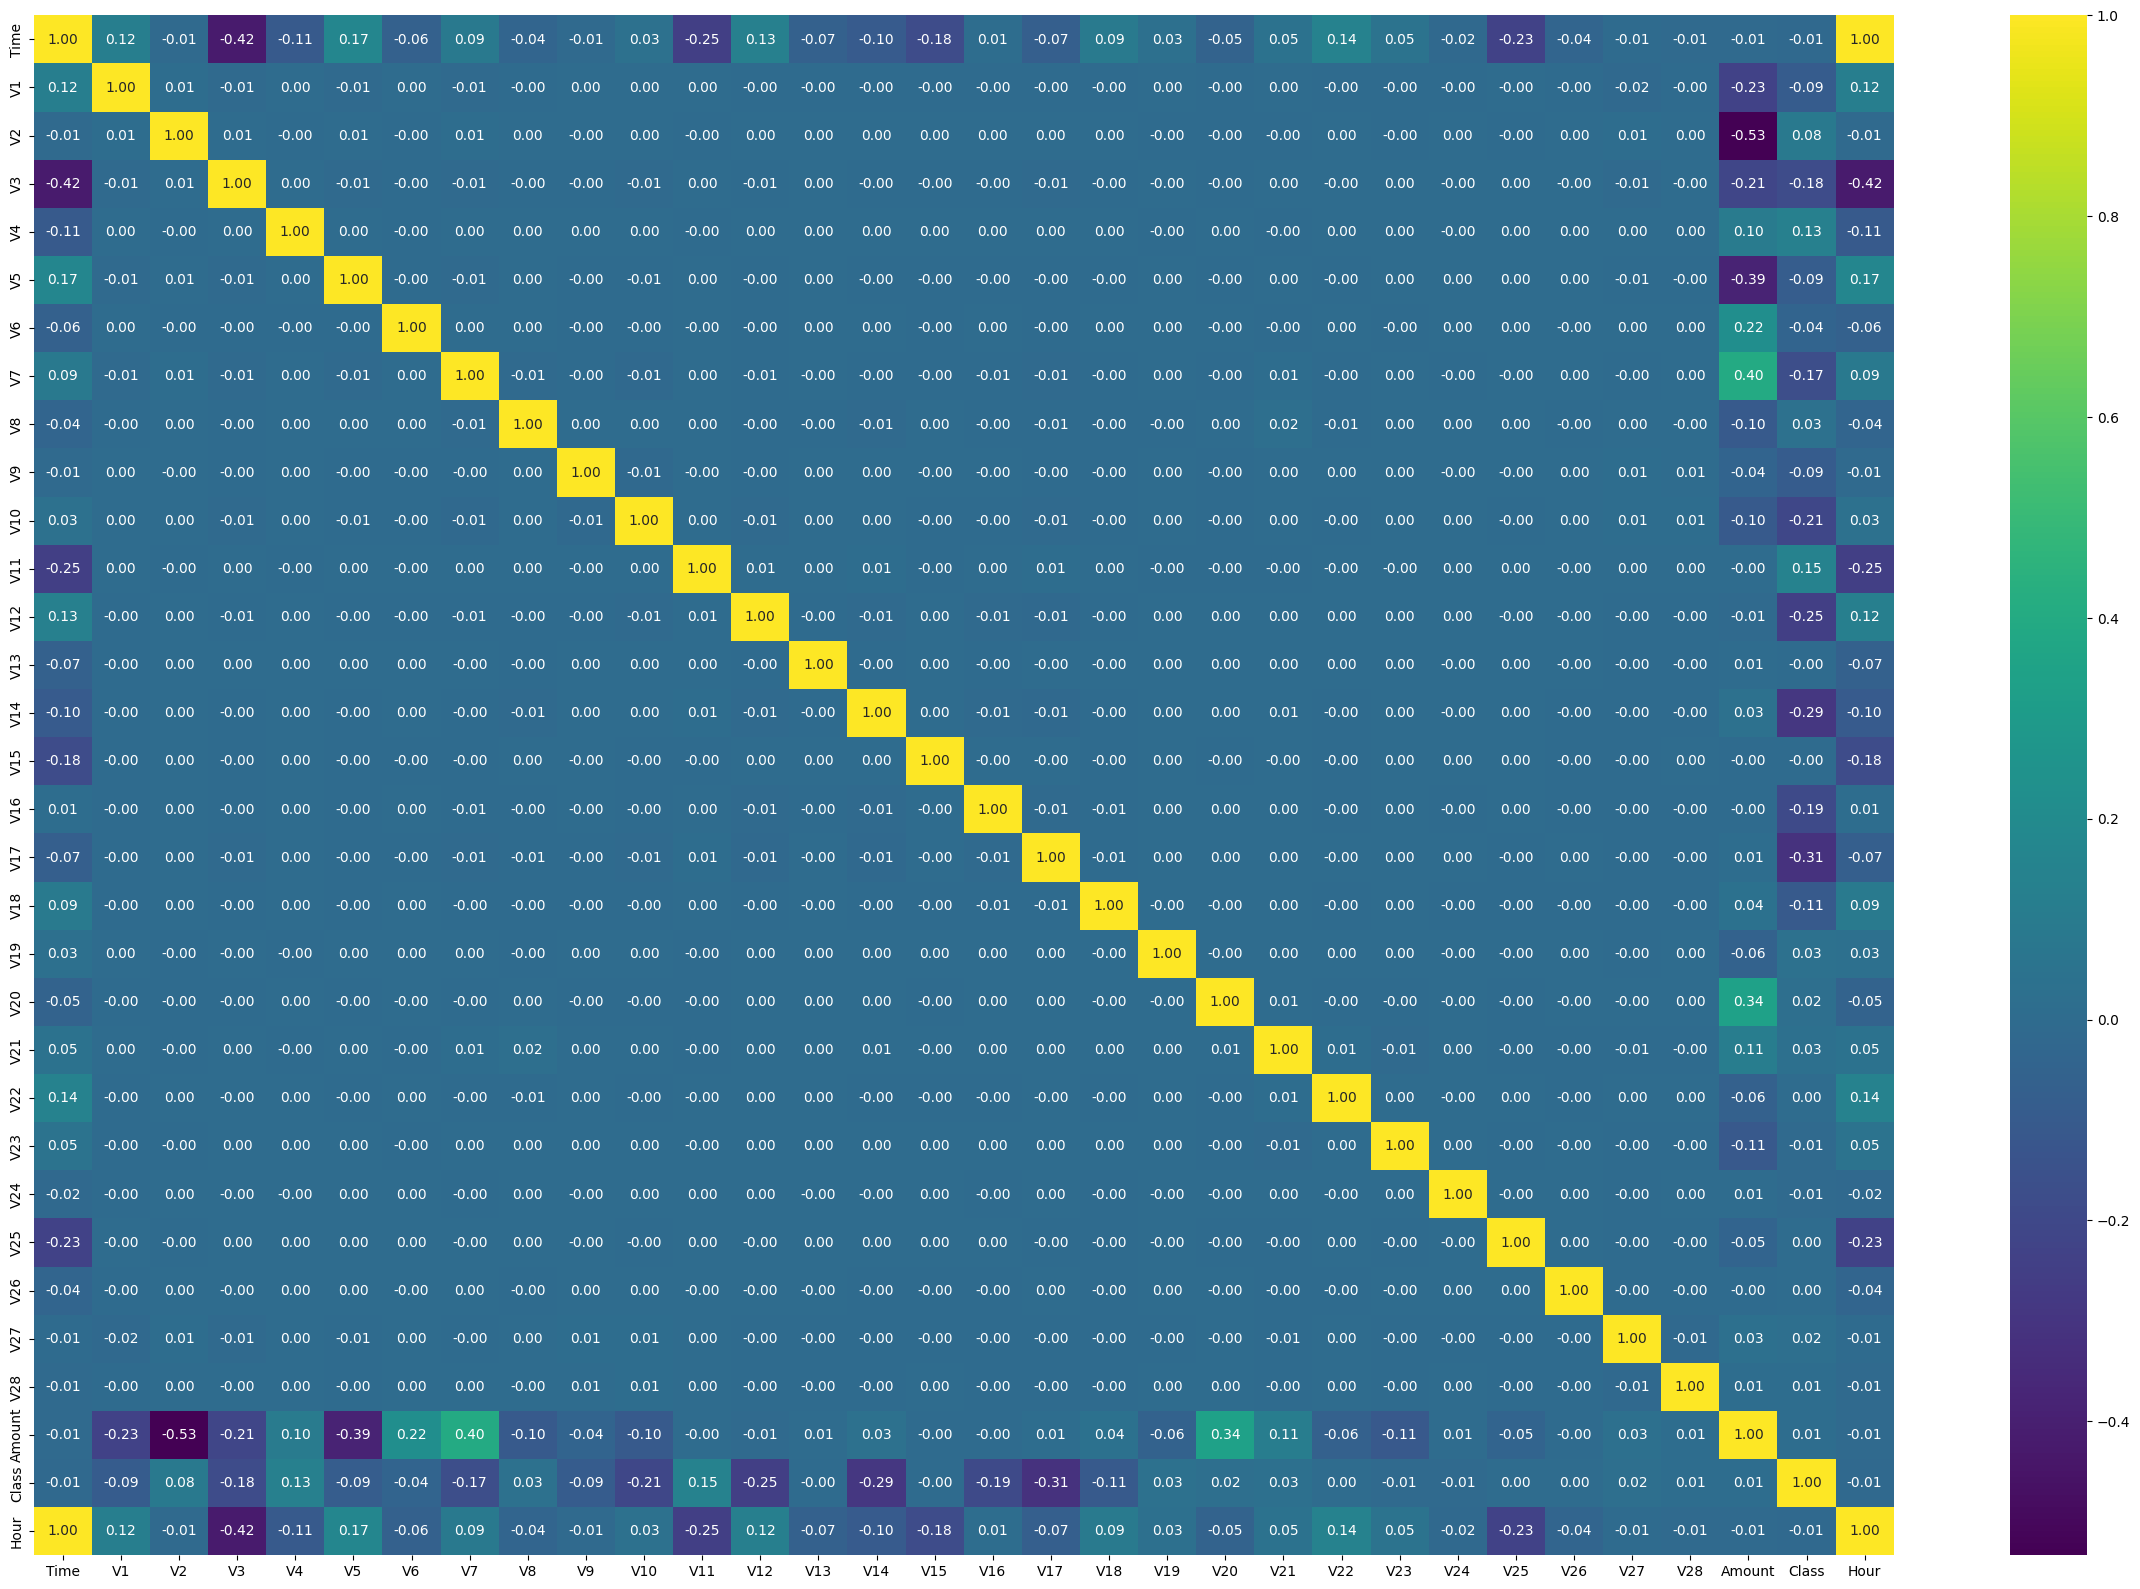

In [ ]:
plt.figure(figsize = (30,20));
sns.heatmap(data.corr(), annot=True,fmt=".2f", cmap="viridis");

**Observation**

* There is no notable correlation among the V tags features.

* V1, ,V4, V5, V12 & V22 has positive correlation with Time, with less than 20%.

* V3, V11 & V22 has negative correlation with Time, with greather than 20%.

* V7 & V20 are positively correlated with Amount with 40% and 34% respectively.

* V3, V4, V7, V10, V11, V12, V14, V16, 17, V18 are either positive or negative correlated with **Class** by greather than 10%.

### Features density plot

we want to check difference in class with respect to each features. The plot shows which features have seperate class pattern, and those that have the same pattern.

In [ ]:
variables = data.columns.values

<Figure size 640x480 with 0 Axes>

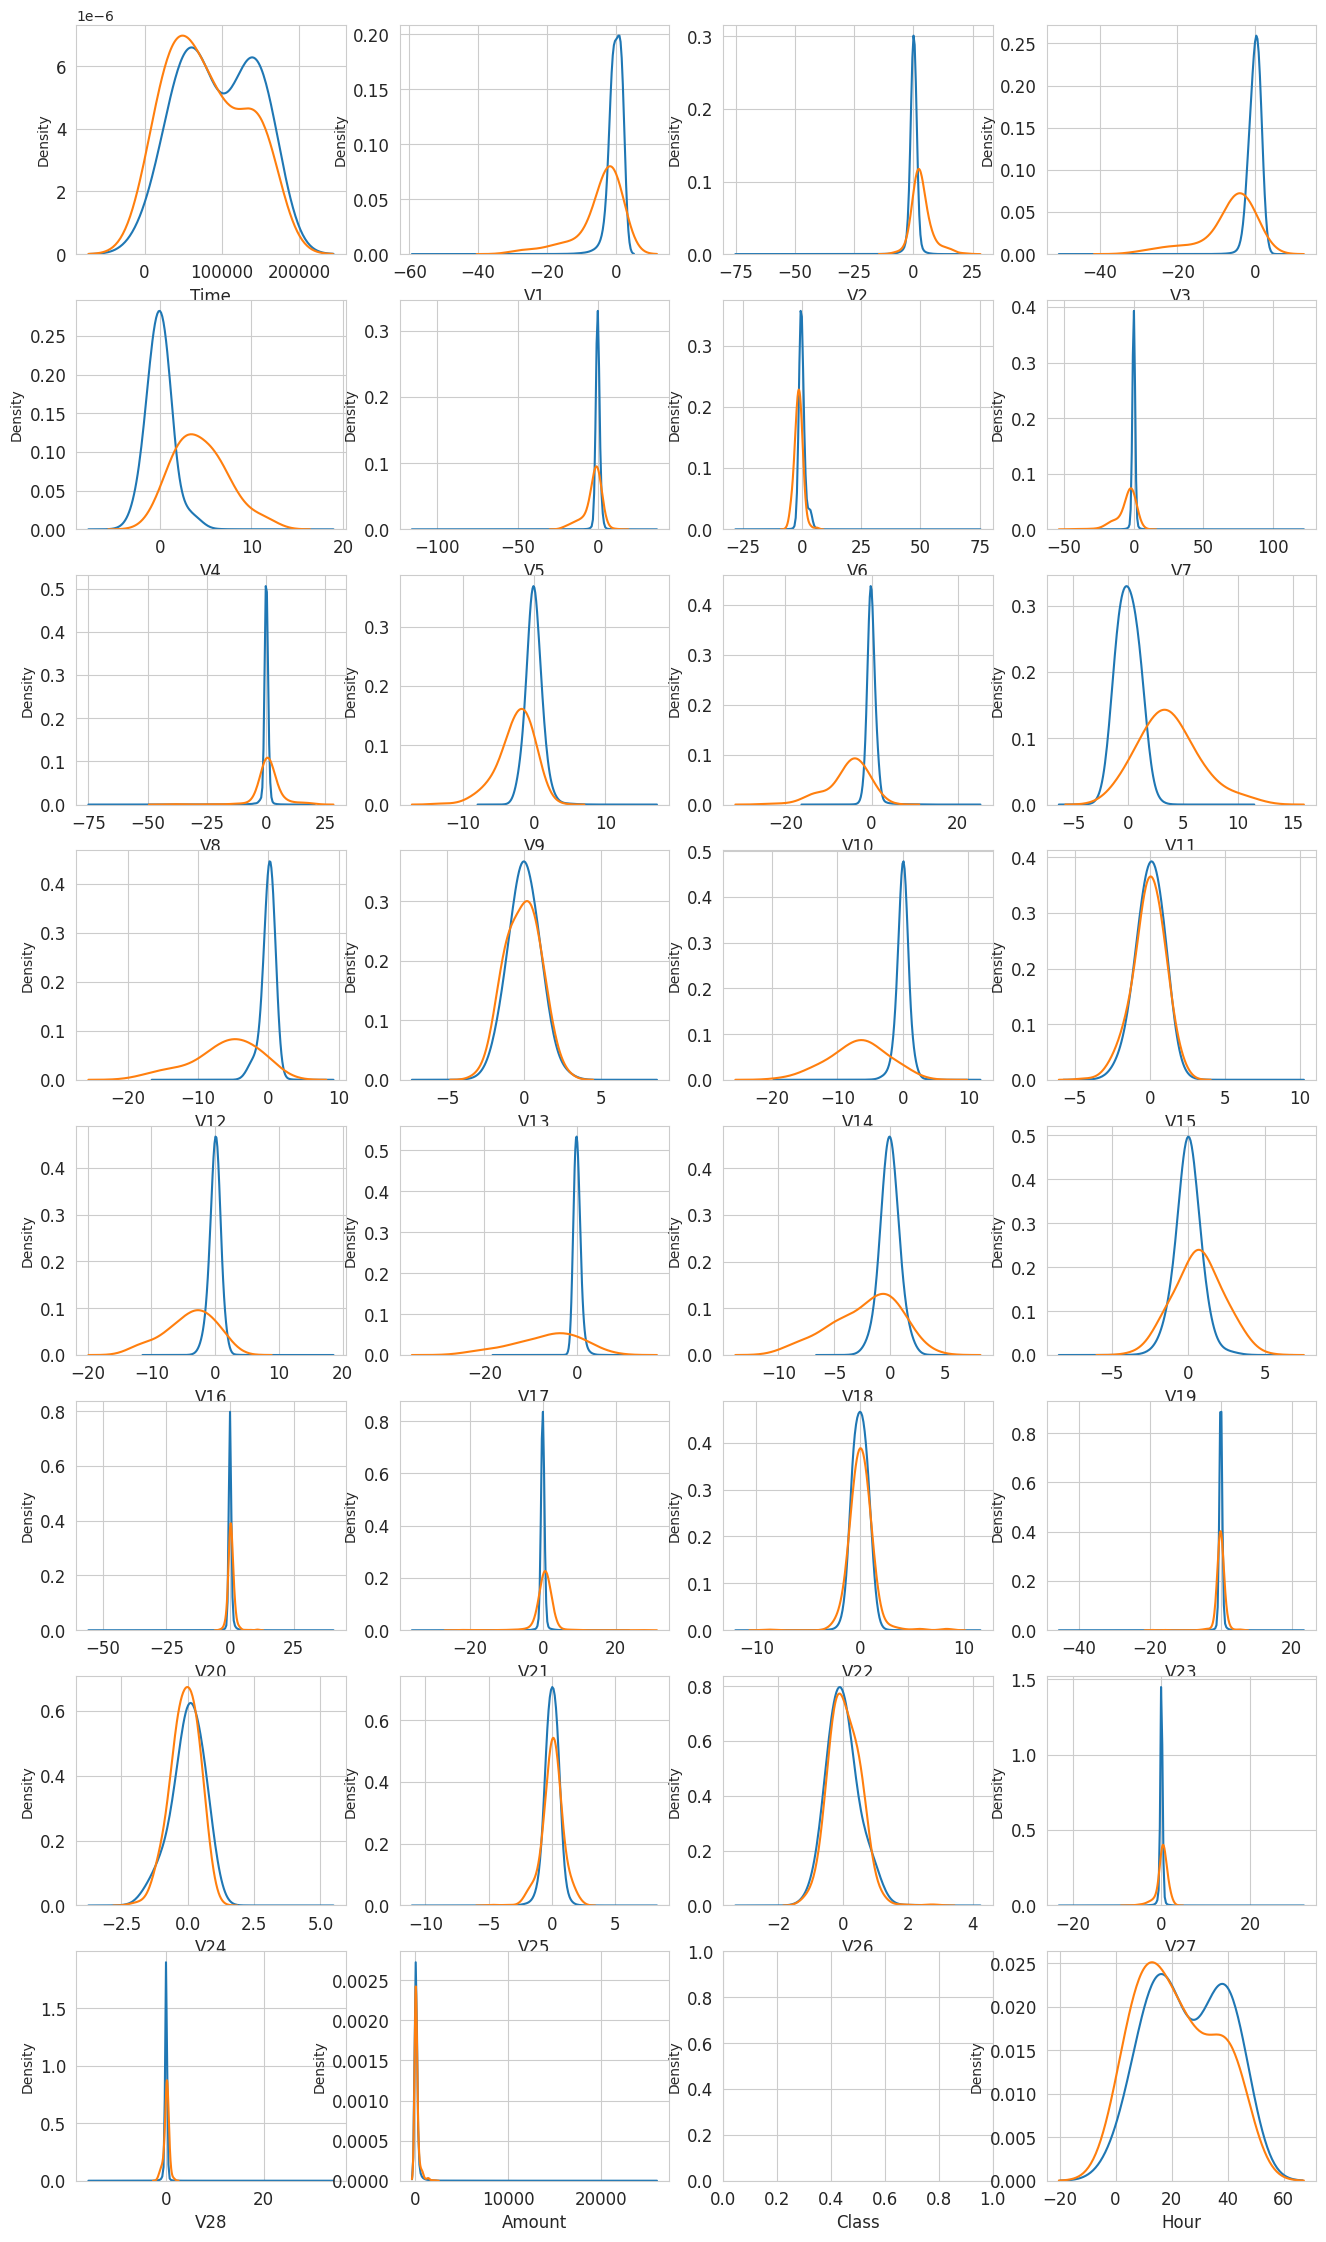

In [ ]:
i = 0
no_fraud = data.loc[data['Class'] == 0]
fraud = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in variables:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(no_fraud[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

**Observation**

* V3,V4, V9, V10, V11, V12, V14, V16, V18, have seperate pattern with the class.

### Machine Learning model phase (Before Applying Feature Selection)

* Cross validation - The data will be seperated to train and validate data using one hold out stratify method. This will help us to have balance class in both the training and validation data. It is helpful to make generalize  models better.

### Evaluation metrics

* The right evaluation metrics is roc_auc curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

* Machine Learning models

In [ ]:
X = data.drop(['Class', 'Hour'], axis=1)
y = data['Class']

In [ ]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2023, stratify=y)

In [ ]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (226980, 30)
Shape of the y_train (226980,)
Shape of the X_test (56746, 30)
Shape of the y_test (56746,)


In [ ]:
ml_models = [LogisticRegression(),
         GaussianNB(),
         ExtraTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, max_features='auto', class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        CatBoostClassifier(eval_metric='AUC', metric_period=20, logging_level='Silent'),
         XGBClassifier(max_depth=4, n_estimators=500),]

names = ['Logistic_Regression','Guassian','ExtraTree','RandomForest','Decision_Tree','Catboost', 'Xgboost']

In [ ]:
roc_list = []
logloss_list = []
for name in ml_models:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    roc_score= roc_auc_score(y_test,y_pred)
    logloss_score = log_loss(y_test,y_pred)
    roc_list.append(roc_score)
    logloss_list.append(logloss_score)

In [ ]:
evaluation = pd.DataFrame({'Model': names,
                           'ROC_Score': roc_list,
                           'LogLoss_Score':logloss_list})

In [ ]:
evaluation = evaluation.sort_values(by='ROC_Score', ascending=False)

In [ ]:
evaluation

,Model,ROC_Score,LogLoss_Score
5,Catboost,0.974183,0.003678
3,RandomForest,0.970698,0.075074
6,Xgboost,0.964989,0.004592
1,Guassian,0.955014,0.139544
4,Decision_Tree,0.894522,0.004643
0,Logistic_Regression,0.886298,0.009885
2,ExtraTree,0.797349,0.007899


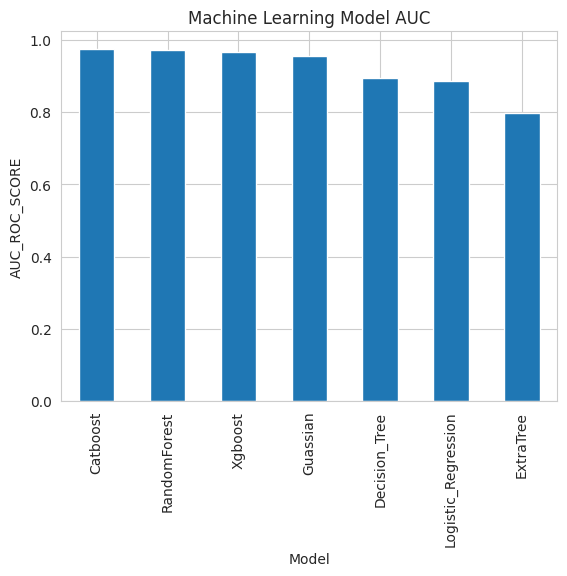

In [ ]:
ax = evaluation.plot.bar(x='Model', y='ROC_Score', legend= False);
ax.set_title('Machine Learning Model AUC');
ax.set_xlabel('Model');
ax.set_ylabel('AUC_ROC_SCORE');

In [ ]:
eval_logloss = evaluation.sort_values(by='LogLoss_Score', ascending=True)

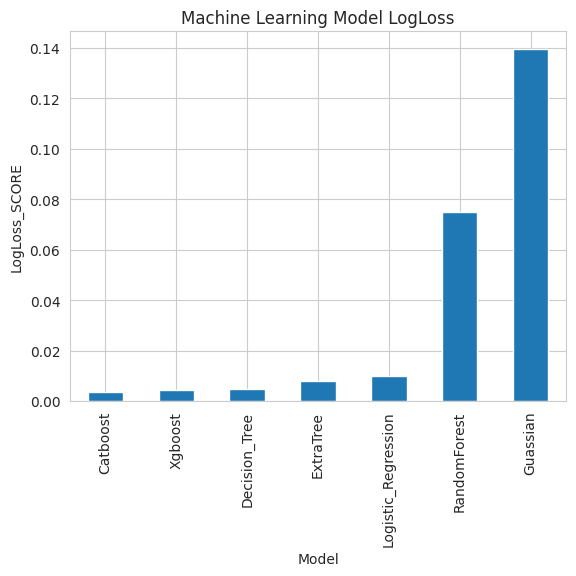

In [ ]:
ax = eval_logloss.plot.bar(x='Model', y='LogLoss_Score', legend= False);
ax.set_title('Machine Learning Model LogLoss');
ax.set_xlabel('Model');
ax.set_ylabel('LogLoss_SCORE');

**Observation**

* The top 3 best models are Catboost, RandomForest, and Xgboost.

### Feature selection Method

Variance inflation factor will be the feature selection method for Logistic regression model.

Feature Importance Selection method will be selected and Interpretable, Machine Learning (Using Shaeply values) will be used to explain the model.

### Logistic Regression

VIF > 10, then we should definitely eliminate the variable.
VIF > 5, We need to inspect the variable before eliminating it.
VIF < 5, is definitely a good variable and we should not eliminate it.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_const = sm.add_constant(X)

In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)

   Feature        VIF
0     Time   1.883851
1       V1   1.656669
2       V2   4.467685
3       V3   1.879467
4       V4   1.141301
5       V5   2.866851
6       V6   1.578711
7       V7   2.923828
8       V8   1.134124
9       V9   1.024321
10     V10   1.125354
11     V11   1.115713
12     V12   1.030677
13     V13   1.008479
14     V14   1.032034
15     V15   1.064241
16     V16   1.000915
17     V17   1.011412
18     V18   1.031429
19     V19   1.039877
20     V20   2.406956
21     V21   1.140172
22     V22   1.089913
23     V23   1.164070
24     V24   1.000816
25     V25   1.131789
26     V26   1.003516
27     V27   1.011060
28     V28   1.001726
29  Amount  12.296464


In [ ]:
lr_feat = vif_data[vif_data['VIF'] < 5.0]['Feature'].to_list()

In [ ]:
X = data[lr_feat]
y = data['Class']

In [ ]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.011926
         Iterations 12


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283697
Method:                           MLE   Df Model:                           28
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:                 0.03270
Time:                        11:50:50   Log-Likelihood:                -3383.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 2.186e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.44e-06    -85.676      0.000      -0.000      -0.000
V1             0.8879      0.028     31.789      0.000       0.833       0.943
V2            -0.4696      0.026    -18.189      0.0

In [ ]:
lr_model_exp = (np.exp(result.params).round(2)).reset_index().rename(columns={'index':'features', 0:'odd_ratio'})

In [ ]:
lr_model_exp['p_values'] = result.pvalues.round(2).values

In [ ]:
lr_model_exp = lr_model_exp.sort_values('p_values', ascending=False).reset_index(drop=True)

Let Remove the Features that are nou significant to the model and check the Logistics Regression metrics

In [ ]:
lr_model_exp[lr_model_exp['p_values'] > 0.05]['features'].to_list()

['V24', 'V19', 'V28', 'V18']

In [ ]:
def lrfm(X, y, model, features):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    features = features
    print('Features length', len(features))
    model.fit(X_train[features], y_train)
    y_pred = model.predict_proba(X_test[features])[:, 1]
    roc_score = roc_auc_score(y_test, y_pred)
    logloss_score = log_loss(y_test, y_pred)
    print('AUC SCORE After Feature Selection:', roc_score)
    print("Log Loss After Feature Selection:", logloss_score)

In [ ]:
X = data[lr_feat]
y = data['Class']

In [ ]:
lr_model = LogisticRegression()

In [ ]:
### Model Performance After Removing Amount using VIF
lrfm(X, y, model=lr_model, features=X.columns)

Features length 29
AUC SCORE After Feature Selection: 0.9071509863253215
Log Loss After Feature Selection: 0.0078021453887783


In [ ]:
### Model Performance After Removing the 4 features with p values > 0.05
lrfm(X, y, model=lr_model, features=X.columns.drop(['V24', 'V19', 'V28', 'V18']))

Features length 25
AUC SCORE After Feature Selection: 0.9048493592810644
Log Loss After Feature Selection: 0.007146312705842134


In [ ]:
### Model Performance After Removing the 2 features with p values > 0.05
lrfm(X, y, model=lr_model, features=X.columns.drop(['V24', 'V19']))

Features length 27
AUC SCORE After Feature Selection: 0.912847359966703
Log Loss After Feature Selection: 0.007325833860189041


In [ ]:
### Model Performance After Removing the top insignificant features
lrfm(X, y, model=lr_model, features=X.columns.drop(['V24']))

Features length 28
AUC SCORE After Feature Selection: 0.9167465804013308
Log Loss After Feature Selection: 0.0074488870503914735


### Using ML models for selecting features

We are going to implement feature selection method for the Top 3 Machine learning models which are Catboost, Xgboost and RandomForest

In [ ]:
def fpw(X, y, model, numt=int):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    # Fit the model on the full training data
    model.fit(X_train, y_train)

    # Check if model supports feature importances
    if hasattr(model, 'feature_importances_'):
        fp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
        fp20 = fp.sort_values(['imp', 'col'], ascending=False)[:numt]['col'].to_list()
        print('Top 20 Features:', fp20)

        # Fit model on top 20 features
        model.fit(X_train[fp20], y_train)
        y_pred = model.predict_proba(X_test[fp20])[:, 1]

        # Evaluation
        roc_score = roc_auc_score(y_test, y_pred)
        logloss_score = log_loss(y_test, y_pred)
        print('AUC SCORE After Feature Selection:', roc_score)
        print("Log Loss After Feature Selection:", logloss_score)

        # Reset index for SHAP values and plots to avoid index errors
        X_train_sub = X_train[fp20].reset_index(drop=True)
        X_test_sub = X_test[fp20].reset_index(drop=True)

        # SHAP values and plot
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_sub)

        # If the model is binary classification, shap_values will not be a list.
        shap.initjs()
        if isinstance(shap_values, list):
            shap.summary_plot(shap_values[1], X_test_sub, plot_type="dot")
        else:
            shap.summary_plot(shap_values, X_test_sub, plot_type="dot")

    else:
        print("The model does not support feature importance extraction.")


### CatBoost

In [ ]:
X = data.drop(['Class', 'Hour'], axis=1)
y = data['Class']

In [ ]:
 cat_model = CatBoostClassifier(eval_metric='AUC', metric_period=20, logging_level='Silent')

Top 20 Features: ['V1', 'V14', 'V4', 'Amount', 'V10', 'V17', 'V13', 'V19', 'V28', 'V20', 'V8', 'V26', 'V12', 'V22', 'V24', 'V11', 'V3', 'V2', 'V23', 'Time', 'V15', 'V27', 'V18', 'V7', 'V21', 'V9', 'V5', 'V25', 'V6', 'V16']
AUC SCORE After Feature Selection: 0.9755764054891956
Log Loss After Feature Selection: 0.0037050559451499957


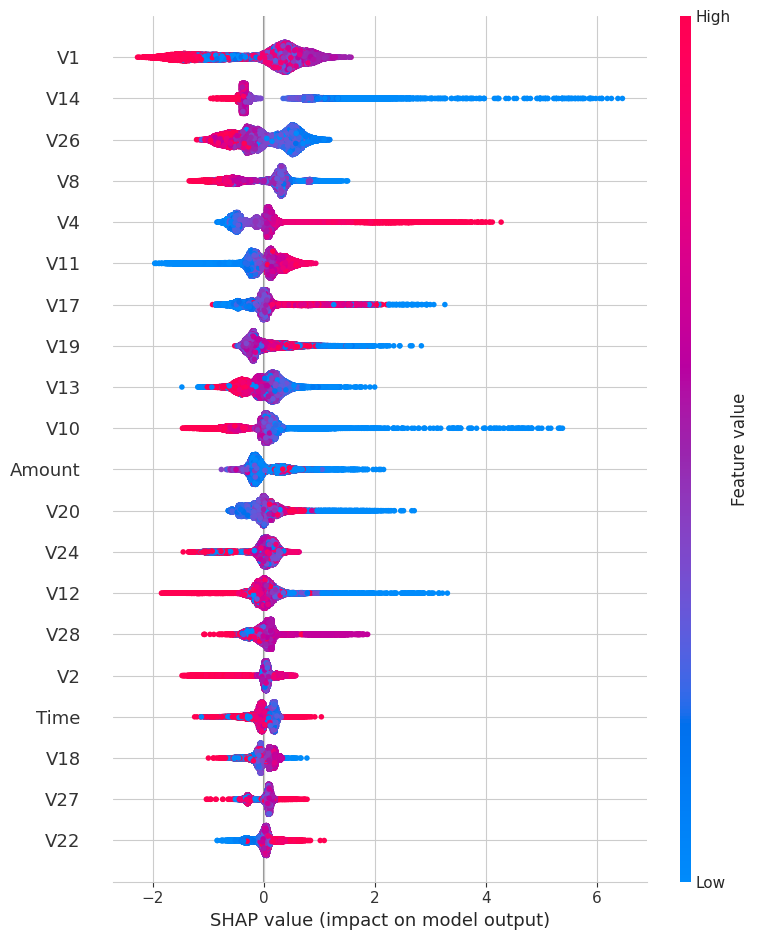

In [ ]:
fpw(X, y, model= cat_model, numt=30)

### Xgboost Model

In [ ]:
 xgb_model = XGBClassifier(max_depth=4, n_estimators=500)

Top 20 Features: ['V14', 'V10', 'V12', 'V7', 'V4', 'V20', 'V17', 'V27', 'V26', 'V21', 'V8', 'V16', 'V1', 'V28', 'Amount', 'V11', 'V19', 'V23', 'V13', 'V6', 'V3', 'Time', 'V5', 'V15', 'V22', 'V9', 'V18', 'V2', 'V24', 'V25']
AUC SCORE After Feature Selection: 0.9609520526882509
Log Loss After Feature Selection: 0.004693269128285837


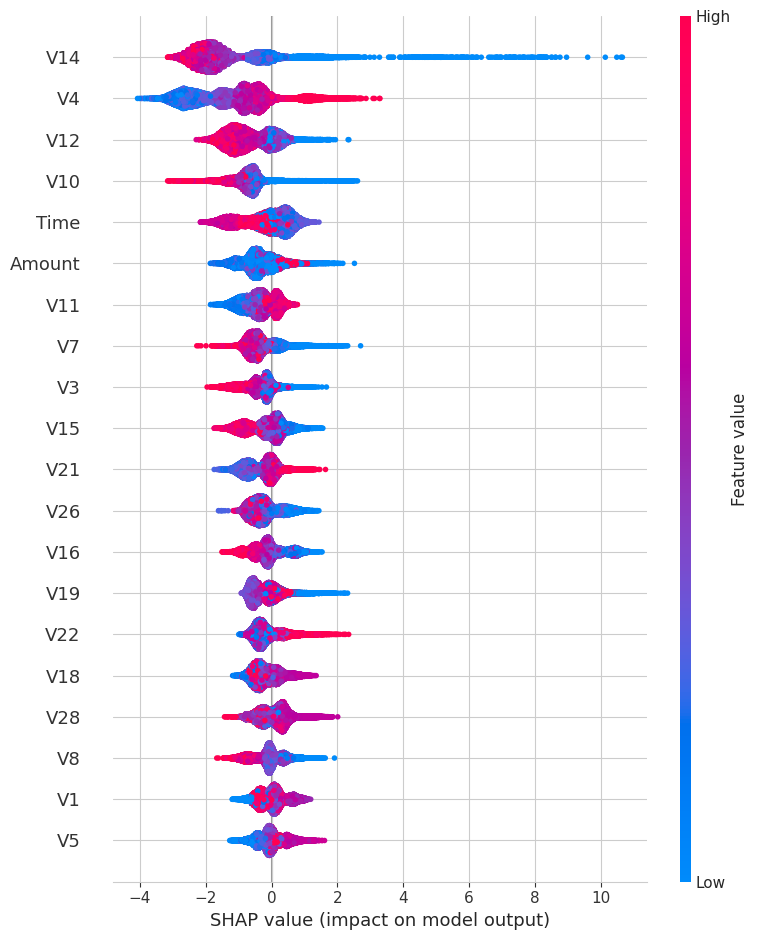

In [ ]:
fpw(X, y, model= xgb_model, numt=30)

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(max_depth=5, max_features='auto', class_weight='balanced')

Top 20 Features: ['V14', 'V10', 'V17', 'V4', 'V12', 'V3', 'V11', 'V16', 'V2', 'V7', 'V18', 'V1', 'V21', 'V9', 'Amount', 'V19', 'V8', 'V20', 'V5', 'V27']
AUC SCORE After Feature Selection: 0.9703375886893807
Log Loss After Feature Selection: 0.07321221203506069


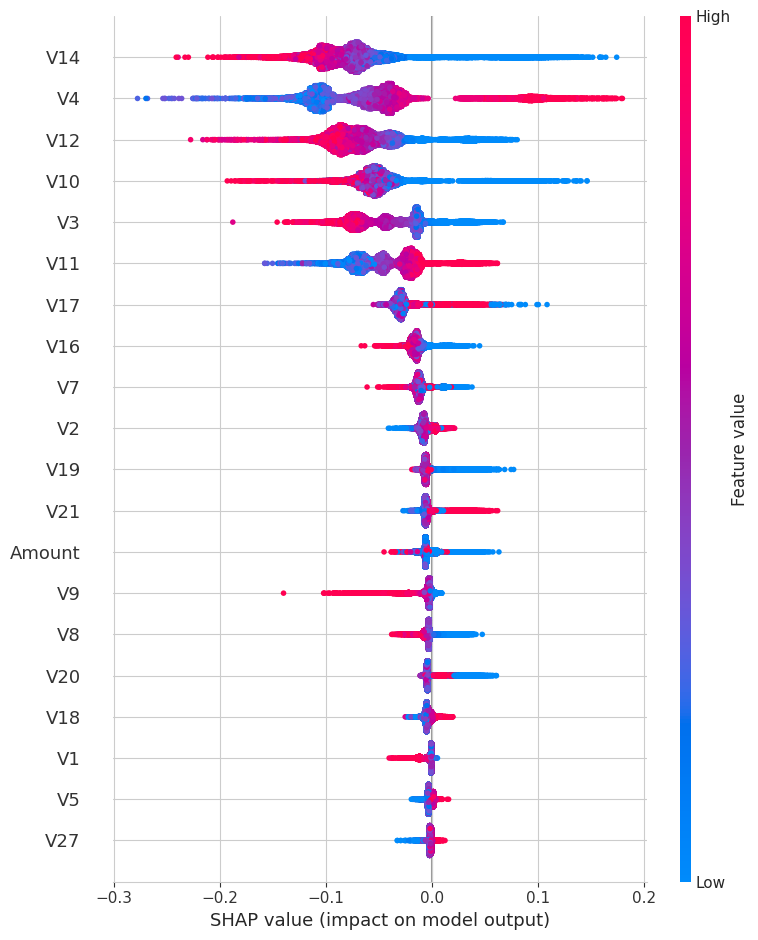

In [ ]:
fpw(X, y, model= rf_model, numt=20)

### Logistics Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)

In [ ]:
lr_drop = ['Amount','V24']

In [ ]:
lr_model.fit(X_train.drop(lr_drop, axis=1), y_train)

LogisticRegression()

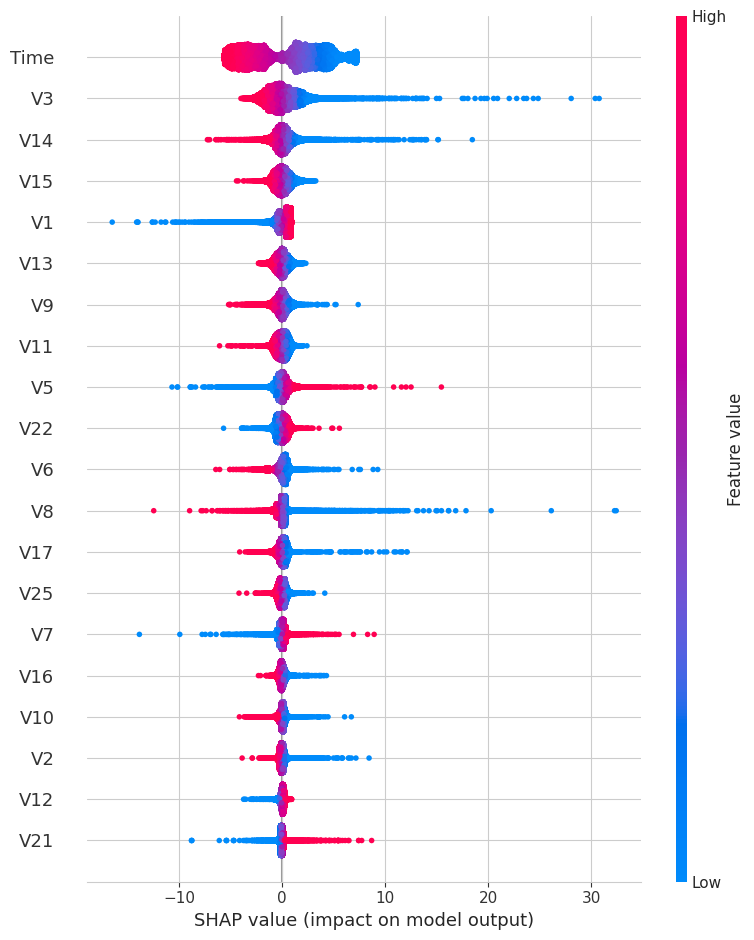

In [ ]:
explainer = shap.LinearExplainer(lr_model, X_train.drop(lr_drop, axis=1), feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test.drop(lr_drop, axis=1))

# Visualize the results
shap.summary_plot(shap_values, X_test.drop(lr_drop, axis=1), plot_type="dot")

### Decision Tree

In [ ]:
dtr = DecisionTreeClassifier(max_depth=5)
dtr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

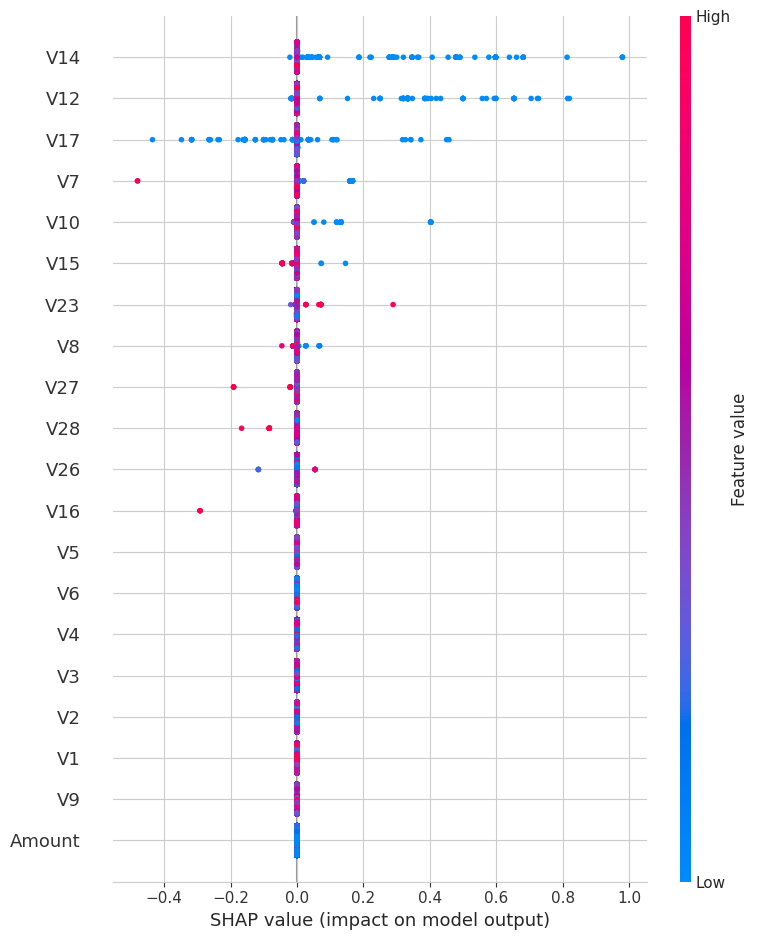

In [ ]:
explainer = shap.TreeExplainer(dtr, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize the results
shap.summary_plot(shap_values[1], X_test, plot_type='dot')

### ExtraTree

In [ ]:
extr = ExtraTreeClassifier()
extr.fit(X_train, y_train)

ExtraTreeClassifier()

 99%|===================| 112905/113492 [00:34<00:00]       

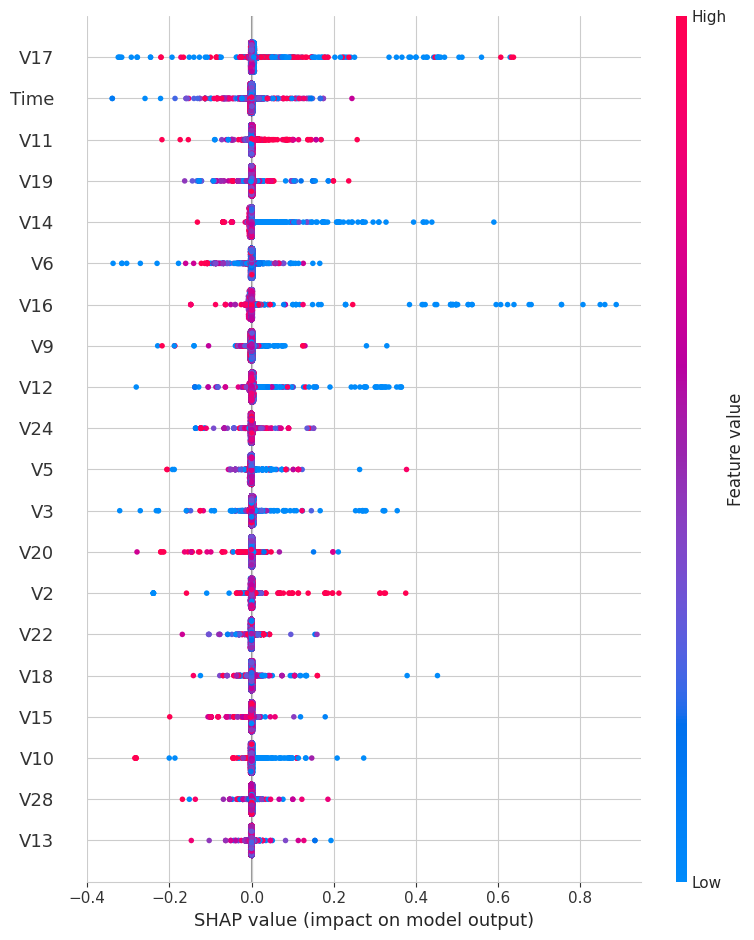

In [ ]:
explainer = shap.TreeExplainer(extr, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize the results
shap.summary_plot(shap_values[1], X_test, plot_type='dot')

In [ ]:
h